<a href="https://colab.research.google.com/github/Rish0x29/Python/blob/main/Fastf1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
print("Welcome to Python with F1! 🏁")
print("-" * 40)

# Variables - storing F1 information
driver_name = "Max Verstappen"
driver_number = 1
team = "Red Bull Racing"
world_championships = 3

print(f"Driver: {driver_name}")
print(f"Number: {driver_number}")
print(f"Team: {team}")
print(f"Championships: {world_championships}")

# Basic math with lap times
fastest_lap_seconds = 78.234
second_fastest = 78.567
difference = second_fastest - fastest_lap_seconds

print(f"\nLap time difference: {difference:.3f} seconds")

Welcome to Python with F1! 🏁
----------------------------------------
Driver: Max Verstappen
Number: 1
Team: Red Bull Racing
Championships: 3

Lap time difference: 0.333 seconds


In [9]:
print("\n" + "="*40)
print("Installing FastF1 library...")
print("="*40)

# Install FastF1 and required libraries
!pip install fastf1 --quiet
!pip install pandas matplotlib seaborn --quiet

print("✅ Installation complete!")


Installing FastF1 library...
✅ Installation complete!


In [10]:
# ============================================
# SECTION 3: Import Libraries
# ============================================

import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

# Enable FastF1 cache (stores data locally for faster access)
os.makedirs('cache', exist_ok=True)
fastf1.Cache.enable_cache('cache')

print(f"FastF1 version: {fastf1.__version__}")

FastF1 version: 3.7.0


In [12]:
print("\n" + "="*40)
print("Loading F1 Session Data...")
print("="*40)

# Load a recent race session
session = fastf1.get_session(2025, 'Monaco', 'Q')

# Load session data (this might take a moment)
session.load()

print(f"Loaded: {session.event['EventName']} - {session.name}")
print(f"Date: {session.date}")

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Qualifying [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...



Loading F1 Session Data...


req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '' in Ergastresponse.
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached dat

Loaded: Monaco Grand Prix - Qualifying
Date: 2025-05-24 14:00:00


In [13]:
# ============================================
# SECTION 5: Exploring Basic Session Info
# ============================================

print("\n" + "="*40)
print("Session Information")
print("="*40)

# Get basic session details
print(f"Track: {session.event['Location']}")
print(f"Country: {session.event['Country']}")
print(f"Session Type: {session.name}")
print(f"Total Laps: {len(session.laps)}")


Session Information
Track: Monaco
Country: Monaco
Session Type: Qualifying
Total Laps: 433


In [14]:
# ============================================
# SECTION 6: Working with Driver Data
# ============================================

print("\n" + "="*40)
print("Driver Information")
print("="*40)

# Get all drivers in the session
drivers = session.drivers
print(f"Number of drivers: {len(drivers)}")
print(f"Driver numbers: {list(drivers)}")

# Get driver names
for driver_num in drivers[:5]:  # Show first 5 drivers
    driver_info = session.get_driver(driver_num)
    print(f"#{driver_num}: {driver_info['FullName']}")


Driver Information
Number of drivers: 20
Driver numbers: ['4', '16', '81', '44', '1', '6', '14', '31', '30', '23', '55', '22', '27', '63', '12', '5', '87', '10', '18', '43']
#4: Lando Norris
#16: Charles Leclerc
#81: Oscar Piastri
#44: Lewis Hamilton
#1: Max Verstappen


In [20]:
# ============================================
# SECTION 7: Basic Lap Time Analysis
# ============================================

print("\n" + "="*40)
print("Fastest Laps")
print("="*40)

# Get all laps from the session
laps = session.laps

# Find the fastest lap
fastest_lap = laps.pick_fastest()
print(f"Fastest lap by: {fastest_lap['Driver']}")
print(f"Lap time: {fastest_lap['LapTime']}")
print(f"Team: {fastest_lap['Team']}")


Fastest Laps
Fastest lap by: NOR
Lap time: 0 days 00:01:09.954000
Team: McLaren



Creating Your First F1 Visualization


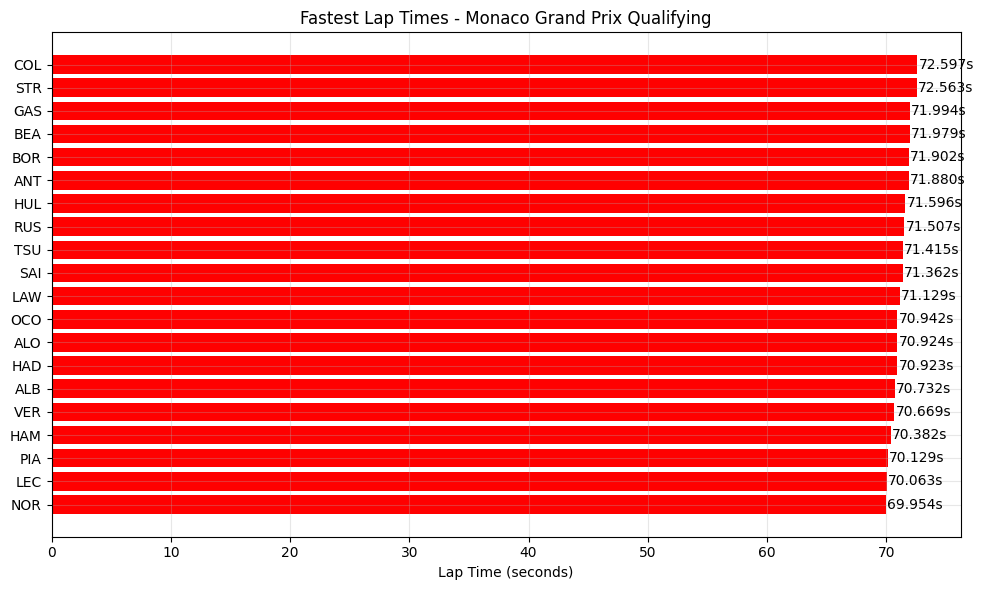

In [25]:
# ============================================
# SECTION 8: Your First Visualization
# ============================================

print("\n" + "="*40)
print("Creating Your First F1 Visualization")
print("="*40)

# Get fastest laps for each driver #Using group by
driver_fastest = laps.groupby('Driver')['LapTime'].min().sort_values()

# Convert to seconds for plotting
driver_fastest_seconds = driver_fastest.dt.total_seconds()

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(driver_fastest_seconds)), driver_fastest_seconds, color="red")
plt.yticks(range(len(driver_fastest_seconds)), driver_fastest_seconds.index)
plt.xlabel('Lap Time (seconds)')
plt.title(f'Fastest Lap Times - {session.event["EventName"]} {session.name}')
plt.grid(True, alpha=0.3)

# Add time labels on bars
for i, (driver, time) in enumerate(driver_fastest_seconds.items()):
    plt.text(time + 0.1, i, f'{time:.3f}s', va='center')

plt.tight_layout()
plt.show()

In [26]:
# ============================================
# SECTION 9: Working with Lists (F1 Context)
# ============================================

print("\n" + "="*40)
print("Python Lists with F1 Data")
print("="*40)

# Creating lists
top_teams = ["Red Bull", "Ferrari", "McLaren", "Mercedes", "Aston Martin"]
points = [860, 652, 608, 409, 217]  # Example 2024 constructor points

# Accessing list elements
print(f"Leading team: {top_teams[0]}")
print(f"Points: {points[0]}")

# List operations
top_teams.append("Alpine")
points.append(120)

# Iterate through lists
print("\nConstructor Standings:")
for i, team in enumerate(top_teams):
    print(f"{i+1}. {team}: {points[i]} points")


Python Lists with F1 Data
Leading team: Red Bull
Points: 860

Constructor Standings:
1. Red Bull: 860 points
2. Ferrari: 652 points
3. McLaren: 608 points
4. Mercedes: 409 points
5. Aston Martin: 217 points
6. Alpine: 120 points


In [27]:
# ============================================
# SECTION 10: Dictionaries (F1 Context)
# ============================================

print("\n" + "="*40)
print("Python Dictionaries with F1 Data")
print("="*40)

# Creating a dictionary for driver info
driver_data = {
    "VER": {"name": "Max Verstappen", "team": "Red Bull", "number": 1},
    "HAM": {"name": "Lewis Hamilton", "team": "Mercedes", "number": 44},
    "LEC": {"name": "Charles Leclerc", "team": "Ferrari", "number": 16}
}

# Accessing dictionary data
print(f"VER is: {driver_data['VER']['name']}")
print(f"Drives for: {driver_data['VER']['team']}")

# Adding new data
driver_data["NOR"] = {"name": "Lando Norris", "team": "McLaren", "number": 4}

# Iterate through dictionary
print("\nAll Drivers:")
for code, info in driver_data.items():
    print(f"{code}: {info['name']} (#{info['number']}) - {info['team']}")


Python Dictionaries with F1 Data
VER is: Max Verstappen
Drives for: Red Bull

All Drivers:
VER: Max Verstappen (#1) - Red Bull
HAM: Lewis Hamilton (#44) - Mercedes
LEC: Charles Leclerc (#16) - Ferrari
NOR: Lando Norris (#4) - McLaren


NameError: name 'british_gp_race' is not defined